https://www.tensorflow.org/guide/keras/train_and_evaluate?hl=es

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
# Construimos el modelo

# Las entradas van a tener 784 dimensiones en forma de vector (28x28)
inputs = keras.Input(shape=(784,), name="digits")
# Primera capa de la red, con 64 neuronas y usando ReLu
x1 = layers.Dense(64, activation="relu")(inputs)
# Segunda capa de la red, con 64 neuronas y usando ReLu
x2 = layers.Dense(32, activation="relu")(x1)
# La salida de la red con 10 neuronas porque estamos usando un algoritmo de clasificación de 10
# Softmax 
outputs = layers.Dense(10, activation="softmax", name="predictions")(x2)

model = keras.Model(inputs=inputs, outputs=outputs)

In [28]:
import numpy as np
s = np.array([0, 6, 8, 4, 5, 6])
s/8

array([0.   , 0.75 , 1.   , 0.5  , 0.625, 0.75 ])

In [29]:
# Cogemos las imágenes de los dígitos y cogemos el conjunto de train, val y test
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [43]:
# Normalizamos la imagen dividiéndola por 255 y transformándola a imagen 28x28
to_show = (x_train[1]/255).reshape(28,28)
to_show

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.000000

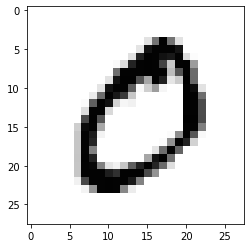

In [44]:
import matplotlib.pyplot as plt

plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

In [32]:
# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [33]:
# Se especifica la configuración del entrenamiento (optimizador, pérdida, métricas):
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [61]:
# Summary
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
predictions (Dense)          (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Entrenamos el modelo con un batch_size de 64 imágenes por cada iteración, 10 epochs y especificando cuál es el conjunto de validación.
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=15,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/15
782/782 [==============================] - 1s 705us/step - loss: 0.0989 - sparse_categorical_accuracy: 0.9710 - val_loss: 0.1109 - val_sparse_categorical_accuracy: 0.9698
Epoch 2/15
782/782 [==============================] - 1s 701us/step - loss: 0.0824 - sparse_categorical_accuracy: 0.9752 - val_loss: 0.1181 - val_sparse_categorical_accuracy: 0.9688
Epoch 3/15
782/782 [==============================] - 1s 691us/step - loss: 0.0715 - sparse_categorical_accuracy: 0.9784 - val_loss: 0.1127 - val_sparse_categorical_accuracy: 0.9671
Epoch 4/15
782/782 [==============================] - 1s 676us/step - loss: 0.0621 - sparse_categorical_accuracy: 0.9809 - val_loss: 0.1010 - val_sparse_categorical_accuracy: 0.9724
Epoch 5/15
782/782 [==============================] - 1s 709us/step - loss: 0.0530 - sparse_categorical_accuracy: 0.9842 - val_loss: 0.1027 - val_sparse_categorical_accuracy: 0.9714
Epoch 6/15
782/782 [==============================] - 1s 693us/

In [55]:
# Podemos ver el histórico que ha ocurrido cogiendo el mejor de cada epoch
history.history

{'loss': [0.09888606518507004,
  0.08236169815063477,
  0.07145299762487411,
  0.06206124648451805,
  0.05303856357932091,
  0.04758048430085182,
  0.04286572337150574,
  0.03847574070096016,
  0.033528413623571396,
  0.03059036284685135,
  0.026874380186200142,
  0.024108052253723145,
  0.021664226427674294,
  0.01912442035973072,
  0.017321212217211723],
 'sparse_categorical_accuracy': [0.9709799885749817,
  0.9752399921417236,
  0.978380024433136,
  0.9809399843215942,
  0.984220027923584,
  0.9850999712944031,
  0.9872000217437744,
  0.9886599779129028,
  0.9900400042533875,
  0.9902799725532532,
  0.9917600154876709,
  0.9929400086402893,
  0.9937999844551086,
  0.9941200017929077,
  0.9947999715805054],
 'val_loss': [0.11092519760131836,
  0.1181284636259079,
  0.1127309575676918,
  0.10103049129247665,
  0.10269494354724884,
  0.10204799473285675,
  0.10529991239309311,
  0.11260759085416794,
  0.11408241838216782,
  0.11892049759626389,
  0.12376954406499863,
  0.12369105219841

In [56]:
# Obtenemos el "score" a partir del conjunto de test
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 0s 543us/step - loss: 0.1267 - sparse_categorical_accuracy: 0.9727
test loss, test acc: [0.12665493786334991, 0.9726999998092651]


In [ ]:
plt.show()

In [57]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:1])
print("predictions shape:", predictions.shape)
predictions

Generate predictions for 3 samples
predictions shape: (1, 10)


array([[3.0163906e-15, 3.4312687e-13, 2.5456131e-08, 1.4537974e-07,
        7.1898361e-21, 2.2886110e-16, 1.3731970e-24, 9.9999988e-01,
        3.7558432e-11, 2.5035457e-10]], dtype=float32)

In [58]:
predictions.max()

0.9999999

In [59]:
predictions.argmax()

7

In [60]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)
for i,image_predicted in enumerate(predictions):
    print("Image",i,":", image_predicted.argmax())
    #plt.imshow(x_test[2:3].reshape(28,28), cmap=plt.cm.get_cmap('Greys'))

Generate predictions for 3 samples
predictions shape: (3, 10)
Image 0 : 7
Image 1 : 2
Image 2 : 1
